<a href="https://colab.research.google.com/github/Stuti-1908/11ty-landing-page/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("/train.csv")
data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data = data.drop(columns = ['PassengerId'])

In [ ]:
data = data.drop(columns = ['Embarked'])

In [ ]:
data = data.drop(columns = ['Cabin'])

In [ ]:
data = data.drop(columns = ['Ticket'])

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#AGE                #Replacing nan values with mean values
from sklearn.impute import SimpleImputer
missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
X=data.iloc[:,5].values
X=X.reshape(-1,1)
data.iloc[:,5] = missingvalueimputer.fit_transform(X)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#GENDER               # Converting String to float
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = data.iloc[:,4].values
data.iloc[:,4] = labelencoder.fit_transform(X)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [ ]:
data = data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
X = data[['PassengerId' ,'Pclass' ,'Sex' ,'Age' ,'SibSp' ,'Parch' ,'Fare' ]]
y = data[['Survived']]

In [ ]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
#Min-max:
# constructor: name same as library
# nmn:normalisation 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_min= mms.fit_transform(X_train)
X_test_min = mms.transform(X_test)


In [ ]:
# standard scaler:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)

0.7892376681614349
              precision    recall  f1-score   support

    survived       0.80      0.88      0.84       139
not survived       0.76      0.64      0.70        84

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


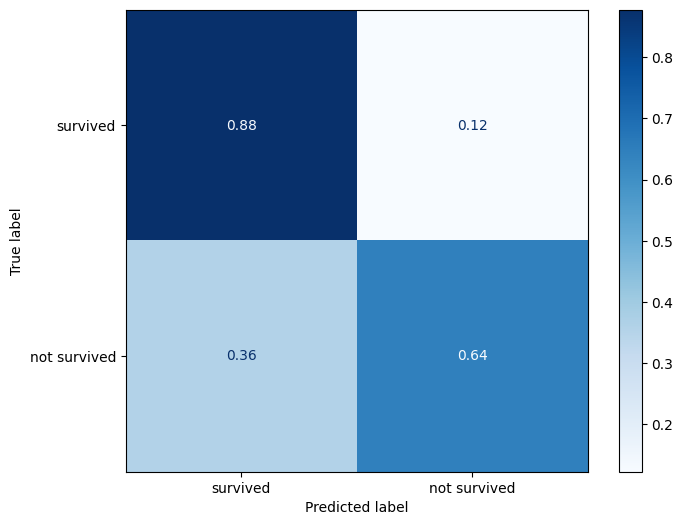

In [ ]:

#Logistic Regression MinMax
from sklearn.linear_model import LogisticRegression #classsification model
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
lgr = LogisticRegression()
lgr.fit(X_train_min , Y_train)

prediction = lgr.predict(X_test_min)
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')